In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization
from keras.models import Sequential

%matplotlib inline

# RGB to BW (dimention reduction)
def convert_to_normalized_grayscale(array):

    a = np.zeros(shape=(array.shape[0], array.shape[1]))    
    
    #convert the image to grayscale and normalize the data
    for i in range(0, array.shape[0]):
        for j in range(0, array.shape[1]):
            a[i,j] = max(array[i,j,0], array[i,j,1], array[i,j,2]) / 255
    
    return a 

In [18]:
dataSize = 600

train_size = int(dataSize * 0.80);

input_row_count = 72
input_column_count = 72
input_data = np.zeros((dataSize, input_row_count, input_column_count))

for i in range(1, dataSize):
    newImg = np.array(Image.open("input/input_" + str(i+1) + ".jpg"))
    newImg = convert_to_normalized_grayscale(newImg)
    input_data[i,:,:] = newImg

training_input = input_data[0:train_size,:,:]
testing_input = input_data[train_size:,:,:]

target_row_count = 121
target_column_count = 180
target_data = np.zeros((dataSize, target_row_count, target_column_count))

for i in range(1, dataSize):
    newImg = np.array(Image.open("target/target_" + str(i+1) + ".jpg"))
    newImg = convert_to_normalized_grayscale(newImg)
    target_data[i,:,:] = newImg

#since tensorflow requires a 4D tesor as input, we put the values in in a forth dimention.
input_data = input_data.reshape(input_data.shape[0], input_row_count, input_column_count, 1)
target_data = target_data.reshape(target_data.shape[0], target_row_count, target_column_count, 1)

#splitting input data into training and validation
training_input = input_data[0:train_size,:,:,:]
testing_input = input_data[train_size:,:,:,:]

#release the initial array from memory
del input_data

#splitting target data into training and validation
training_target = target_data[0:train_size,:,:,:]
testing_target = target_data[train_size:,:,:,:]

print("done")

done


In [40]:
input_shape = (training_input.shape[1], training_input.shape[2], training_input.shape[3])
dropout = 0.4;

model = Sequential()
model.add(Conv2D(12, kernel_size=(5, 5), strides=(2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(24, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(1176, activation='relu'))
model.add(Dense(1176, activation='relu'))
model.add(Reshape((28, 42,1)))
model.add(Conv2DTranspose(14, kernel_size=(5, 6), strides=(2, 2), activation='relu'))
model.add(BatchNormalization(momentum=0.9))
model.add(Conv2DTranspose(1, kernel_size=(5, 6), strides=(2, 2), activation='sigmoid'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 34, 34, 12)        312       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 12)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 24)          7224      
_________________________________________________________________
flatten_9 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1176)              1384152   
_________________________________________________________________
dense_14 (Dense)             (None, 1176)              1384152   
_________________________________________________________________
reshape_7 (Reshape)          (None, 28, 42, 1)         0         
__________

In [ ]:
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

model.fit(training_input, training_target, epochs=100, batch_size=dataSize)

score = model.evaluate(testing_input, testing_target, batch_size=testing_target.shape[0])
score

Epoch 1/100


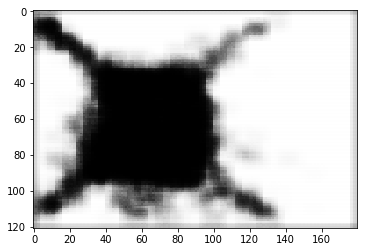

In [20]:
generated = model.predict(testing_input[16:100,:,:,:])
plt.imshow(generated[3,:,:,0], cmap='gray', interpolation='nearest')

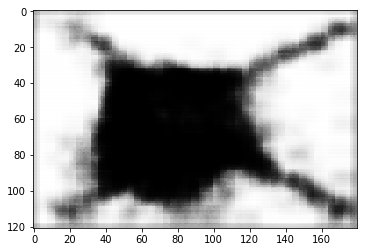

In [23]:
plt.imshow(generated[50,:,:,0], cmap='gray', interpolation='nearest')